In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

## Reading and storing the data

In [4]:
# Create a file path
alzheimers_data = "Resources/alzheimers_prediction_dataset.csv"

# Read the Data
alzheimers_df = pd.read_csv(alzheimers_data)
alzheimers_df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [5]:
alzheimers_df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

## Aaron Singh
Does BMI have an impact on Alzheimer’s diagnosis?
</br>
Do Dietary Habits have an impact on Alzheimer’s diagnosis?

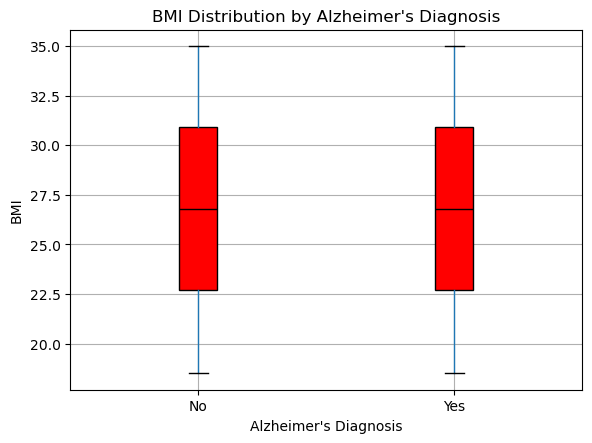

In [6]:
# BMI Distribution by Alzheimer's Diagnosis
alzheimers_df.boxplot(
    column="BMI",
    by="Alzheimer’s Diagnosis",
    patch_artist=True,
    boxprops={"facecolor": "red"},
    medianprops={"color": "black"},
)
plt.xlabel("Alzheimer's Diagnosis")
plt.ylabel("BMI")
plt.title("BMI Distribution by Alzheimer's Diagnosis")
plt.suptitle("")
plt.savefig("Images/BMI/BMI.png", bbox_inches="tight")
plt.show()

In [7]:
# T-test for BMI Differences
alzheimers_bmi = alzheimers_df[alzheimers_df["Alzheimer’s Diagnosis"] == "Yes"]["BMI"]
non_alzheimers_bmi = alzheimers_df[alzheimers_df["Alzheimer’s Diagnosis"] == "No"]["BMI"]
t_stat, p_value_bmi = st.ttest_ind(alzheimers_bmi, non_alzheimers_bmi, equal_var=False)

# Print results
print("T-test for BMI and Alzheimer's Diagnosis")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value_bmi:.4f}")

T-test for BMI and Alzheimer's Diagnosis
T-statistic: -0.4641, P-value: 0.6426


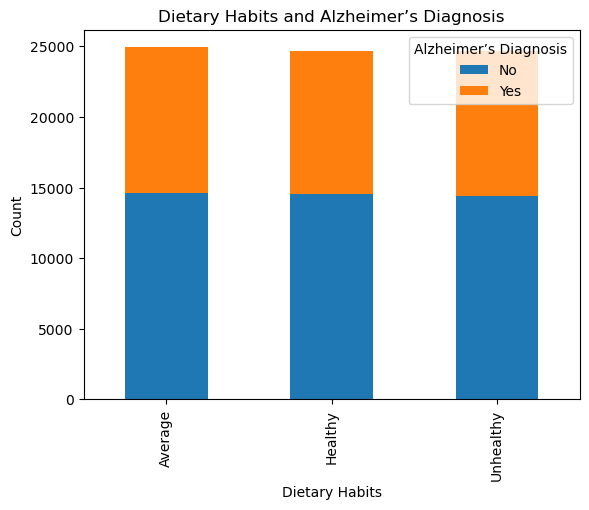

In [8]:
# Dietary Habits vs. Alzheimer's Diagnosis
dietary_counts = (alzheimers_df.groupby(["Dietary Habits", "Alzheimer’s Diagnosis"]).size().unstack())
dietary_counts.plot(kind="bar", stacked=True)
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.title("Dietary Habits and Alzheimer’s Diagnosis")
plt.legend(title="Alzheimer’s Diagnosis", labels=["No", "Yes"])
plt.savefig("Images/DietaryHabits/dietary.png", bbox_inches="tight")
plt.show()

In [9]:
# Chi-square test for Dietary Habits
dietary_crosstab = pd.crosstab(alzheimers_df["Dietary Habits"], alzheimers_df["Alzheimer’s Diagnosis"])
chi2_stat, p_value_diet, _, _ = st.chi2_contingency(dietary_crosstab)

# Print Results
print("Chi-square test for Dietary Habits and Alzheimer's Diagnosis")
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value_diet:.4f}")

Chi-square test for Dietary Habits and Alzheimer's Diagnosis
Chi-square statistic: 1.5262348697219739, P-value: 0.4662


In [10]:
# Conclusion
if p_value_bmi < 0.05:
    print("BMI has a significant impact on Alzheimer's diagnosis.")
else:
    print("BMI does NOT have a significant impact on Alzheimer's diagnosis.")

if p_value_diet < 0.05:
    print("Dietary habits have a significant relationship with Alzheimer's diagnosis.")
else:
    print("Dietary habits do NOT have a significant relationship with Alzheimer's diagnosis.")

BMI does NOT have a significant impact on Alzheimer's diagnosis.
Dietary habits do NOT have a significant relationship with Alzheimer's diagnosis.


## Kieran Nguyen
Does Family History have an impact on Alzheimer’s diagnosis?

In [11]:
InFamily = alzheimers_df.loc[(alzheimers_df["Family History of Alzheimer’s"]=="Yes")]

NotInFamily = alzheimers_df.loc[(alzheimers_df["Family History of Alzheimer’s"]=="No")]

In [12]:
InFamily

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
5,Spain,55,Female,2,34.0,Medium,Current,Never,No,No,...,Healthy,Low,Retired,Married,No,Low,Medium,High,Rural,No
9,Germany,72,Female,11,32.4,Medium,Never,Occasionally,No,Yes,...,Average,High,Employed,Single,No,Low,Low,Medium,Rural,No
11,UK,69,Male,2,19.8,Low,Never,Occasionally,No,No,...,Unhealthy,Low,Unemployed,Married,Yes,High,Low,Medium,Rural,Yes
14,Italy,86,Male,10,32.1,Low,Never,Never,No,No,...,Average,Medium,Unemployed,Widowed,No,Low,Low,Medium,Urban,Yes
15,Canada,53,Female,6,29.1,Low,Never,Occasionally,No,No,...,Unhealthy,Low,Employed,Married,Yes,Medium,High,Low,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74258,Brazil,91,Female,4,21.6,Low,Current,Occasionally,No,No,...,Unhealthy,Medium,Unemployed,Single,No,Medium,Low,High,Rural,No
74269,Saudi Arabia,82,Female,16,27.8,High,Never,Regularly,No,No,...,Healthy,Low,Unemployed,Widowed,Yes,Low,Low,Medium,Urban,Yes
74272,UK,80,Male,18,26.1,High,Former,Occasionally,No,No,...,Healthy,High,Employed,Single,No,Medium,High,Low,Urban,Yes
74273,Norway,75,Female,6,18.9,Medium,Current,Occasionally,No,No,...,Healthy,Medium,Retired,Single,No,High,Medium,High,Rural,No


In [13]:
NotInFamily

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74277,Spain,50,Female,12,19.3,Low,Never,Never,No,Yes,...,Average,Medium,Employed,Widowed,No,Low,High,Low,Rural,No
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


In [14]:
InFamily_NoAlz = InFamily.loc[(InFamily["Alzheimer’s Diagnosis"] == "No")]
Yes_No = len(InFamily_NoAlz["Alzheimer’s Diagnosis"])
InFamily_Alz = InFamily.loc[(InFamily["Alzheimer’s Diagnosis"] == "Yes")]
Yes_Yes = len(InFamily_Alz["Alzheimer’s Diagnosis"])

AlzInFamilyChart = [int(Yes_No), int(Yes_Yes)]
label1 = [
    "Has Family history of Alzheimer's (Alzheimer's Negative)",
    "Has Family history of Alzheimer's (Alzheimer's Positive)",
]

In [15]:
NotInFamily_NoAlz = NotInFamily[(NotInFamily["Alzheimer’s Diagnosis"] == "No")]
No_No = len(NotInFamily_NoAlz["Alzheimer’s Diagnosis"])
NotInFamily_Alz = NotInFamily[(NotInFamily["Alzheimer’s Diagnosis"] == "Yes")]
No_Yes = len(NotInFamily_Alz["Alzheimer’s Diagnosis"])

AlzNotInFamilyChart = np.array([int(No_No), int(No_Yes)])
label2 = [
    "No Family history of Alzheimer's (Alzheimer's Negative)",
    "No Family history of Alzheimer's (Alzheimer's Positive)",
]

In [16]:
AllInOneCHart = np.array([int(Yes_No), int(Yes_Yes), int(No_No), int(No_Yes)])
label3 = [
    "Has Family history of Alzheimer's (Alzheimer's Negative)",
    "Has Family history of Alzheimer's (Alzheimer's Positive)",
    "No Family history of Alzheimer's (Alzheimer's Negative)",
    "No Family history of Alzheimer's (Alzheimer's Positive)",
]

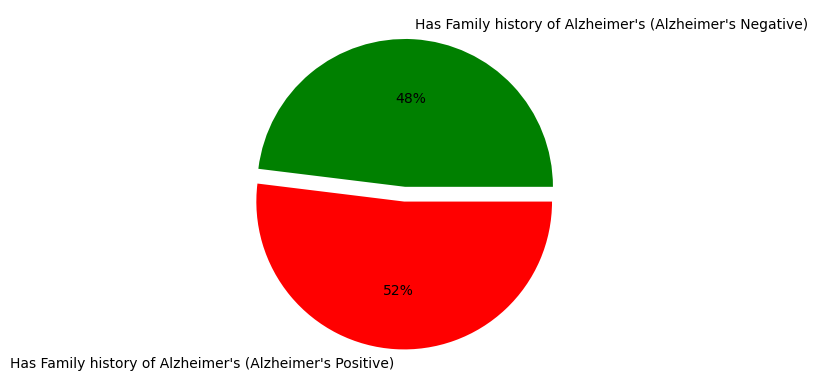

In [17]:
plt.pie(
    AlzInFamilyChart,
    labels=label1,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    colors=["green", "red"],
)
plt.savefig("Images/FamilyHistory/yes_alz_pie.png", bbox_inches="tight")
plt.show()

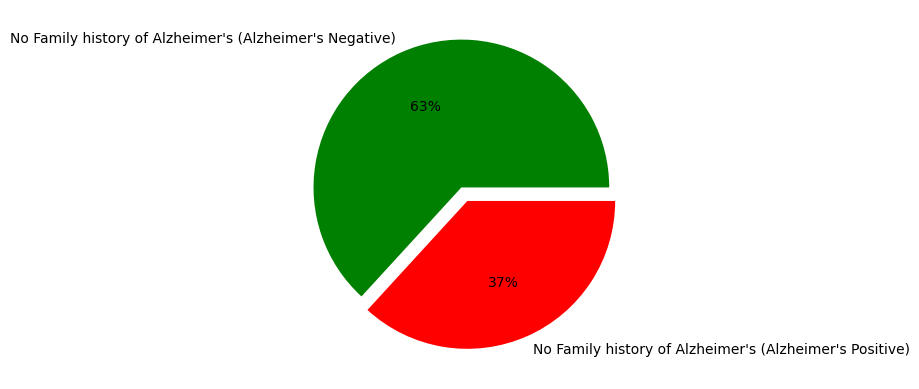

In [18]:
plt.pie(
    AlzNotInFamilyChart,
    labels=label2,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    colors=("green", "red"),
)
plt.savefig("Images/FamilyHistory/no_alz_pie.png", bbox_inches="tight")
plt.show()

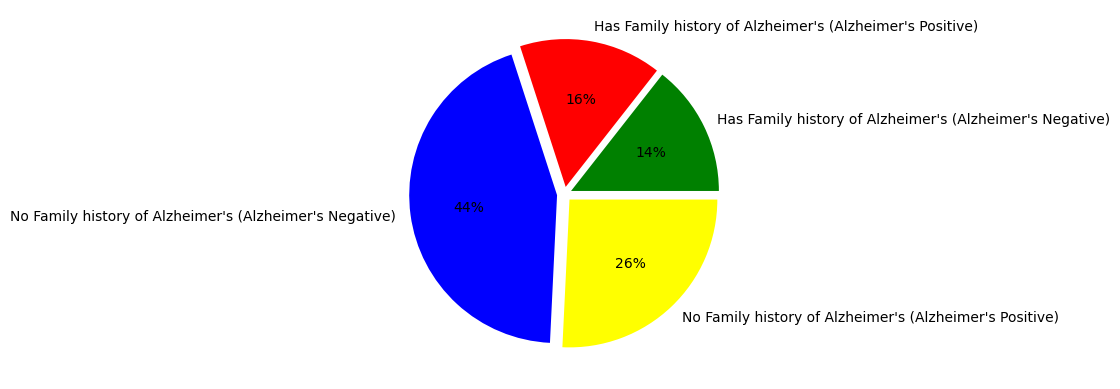

In [19]:
plt.pie(
    AllInOneCHart,
    labels=label3,
    autopct="%1.0f%%",
    explode=(0.05, 0.05, 0.05, 0.05),
    colors=("green", "red", "blue", "yellow"),
)
plt.savefig("Images/FamilyHistory/whole_pie.png", bbox_inches="tight")
plt.show()

## Gennadiy Farladansky
Does Country have an impact on Alzheimer’s diagnosis?
</br>
Does Gender have an impact on Alzheimer’s diagnosis?

In [20]:
# Filter out the cases with "Alzheimer’s Diagnosis" == "No"
df_filtered = alzheimers_df[alzheimers_df["Alzheimer’s Diagnosis"] == "Yes"]

# Get count of Alzheimer test incidents, per country
grouped_summary_df = df_filtered.groupby("Country").size().reset_index(name="Incident Count")
grouped_summary_df

,Country,Incident Count
0,Argentina,1500
1,Australia,1525
2,Brazil,1865
3,Canada,1267
4,China,1388
5,France,1486
6,Germany,1564
7,India,1883
8,Italy,1465
9,Japan,1273


In [21]:
# Get the toal number of countries in research dataset
number_of_countries = len(grouped_summary_df)
number_of_countries

20

In [22]:
# Sort grouped dataframe by number of incidents
grouped_summary_df = grouped_summary_df.sort_values(by="Incident Count", ascending=True)
grouped_summary_df

,Country,Incident Count
17,Sweden,1262
3,Canada,1267
9,Japan,1273
11,Norway,1296
4,China,1388
19,USA,1405
8,Italy,1465
18,UK,1474
16,Spain,1479
5,France,1486


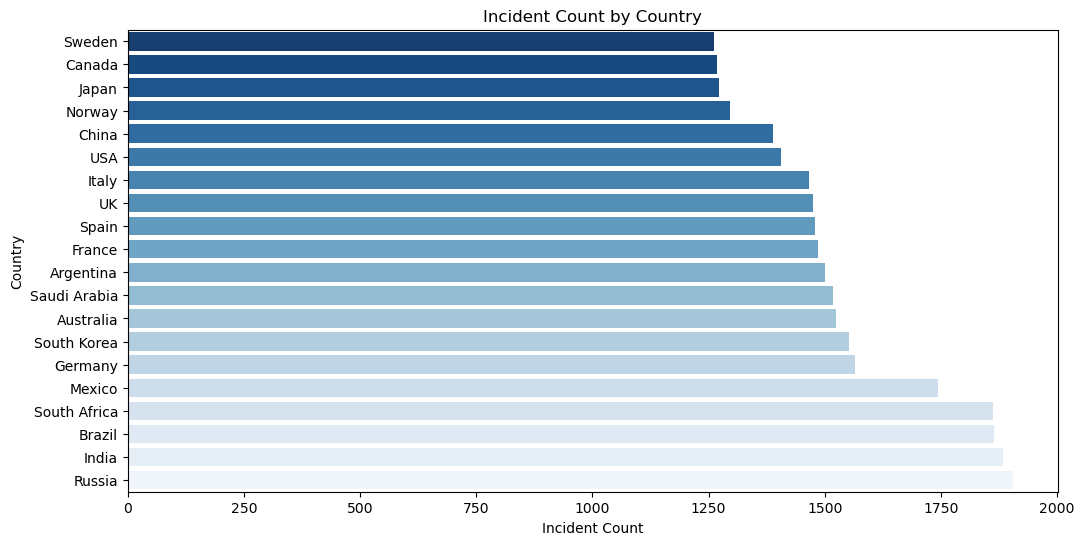

In [23]:
# Plot the bar chart
plt.figure(figsize=(12, 6))

sns.barplot(
    x="Incident Count",
    y="Country",
    data=grouped_summary_df,
    palette="Blues_r",
    dodge=False,
    legend=False,
    hue="Country",
)

# Add labels and title
plt.xlabel("Incident Count")
plt.ylabel("Country")
plt.title("Incident Count by Country")

# Show the plot
plt.savefig("Images/Country/countries.png", bbox_inches="tight")
plt.show()

In [24]:
grouped_by_gender_df = df_filtered.groupby(["Country", "Gender"]).size().reset_index(name="Incident Count")
grouped_by_gender_df

,Country,Gender,Incident Count
0,Argentina,Female,739
1,Argentina,Male,761
2,Australia,Female,755
3,Australia,Male,770
4,Brazil,Female,931
5,Brazil,Male,934
6,Canada,Female,635
7,Canada,Male,632
8,China,Female,695
9,China,Male,693


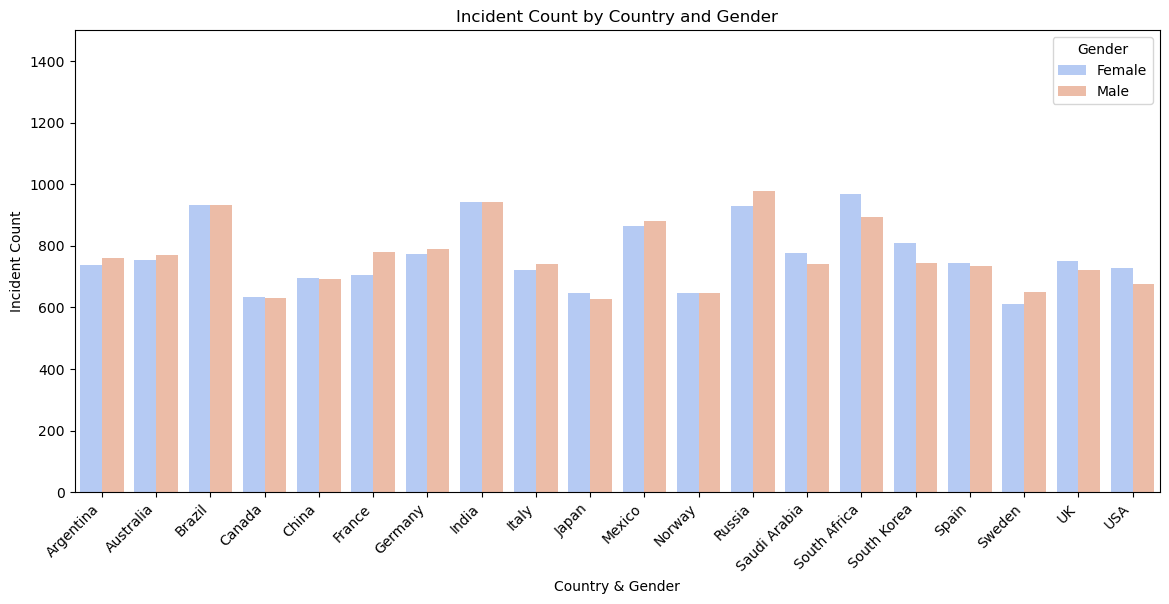

In [25]:
# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(
    x="Country",
    y="Incident Count",
    hue="Gender",
    data=grouped_by_gender_df,
    palette="coolwarm",
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set Y-axis limit to 2500 incident counts
plt.ylim(0, 1500)

# Add labels and title
plt.xlabel("Country & Gender")
plt.ylabel("Incident Count")
plt.title("Incident Count by Country and Gender")
plt.legend(title="Gender")

# Show the plot
plt.savefig("Images/Gender/gender.png", bbox_inches="tight")
plt.show()

In [26]:
# Calculate average incidents count for men
avg_incident_count_male = grouped_by_gender_df[grouped_by_gender_df["Gender"] == "Male"]["Incident Count"].mean()
avg_incident_count_male

766.85

In [27]:
# Calculate average incidents count for women
avg_incident_count_female = grouped_by_gender_df[grouped_by_gender_df["Gender"] == "Female"]["Incident Count"].mean()
avg_incident_count_female

768.8

In [28]:
# Calculate average incidents count for countries
avg_incident_count = grouped_summary_df["Incident Count"].mean()
avg_incident_count

1535.65

## Arseniy Borsukov
Do Cognitive Test Scores have an impact on Alzheimer’s diagnosis?
</br>
Does Cholesterol Level have an impact on Alzheimer’s diagnosis?

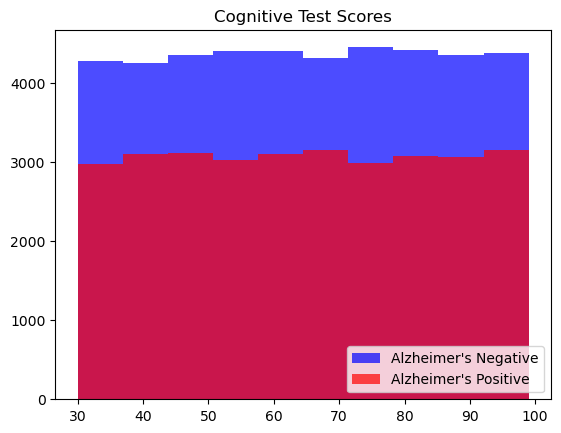

In [29]:
c_yes_alz = alzheimers_df.loc[alzheimers_df["Alzheimer’s Diagnosis"] == "Yes", ["Alzheimer’s Diagnosis", "Cognitive Test Score"]]
c_no_alz = alzheimers_df.loc[alzheimers_df["Alzheimer’s Diagnosis"] == "No", ["Alzheimer’s Diagnosis", "Cognitive Test Score"]]

# First Histogram
plt.hist(
    c_no_alz["Cognitive Test Score"],
    color="blue",
    alpha=0.7,
    label="Alzheimer's Negative",
)

# Second Histogram
plt.hist(
    c_yes_alz["Cognitive Test Score"],
    color="red",
    alpha=0.7,
    label="Alzheimer's Positive",
)
plt.legend(loc="lower right")
plt.title("Cognitive Test Scores")
plt.savefig("Images/CognitiveTestScore/cognitive_test.png", bbox_inches="tight")
plt.show()

In [30]:
alz_group = alzheimers_df.groupby("Alzheimer’s Diagnosis")

cogn_mean = alz_group["Cognitive Test Score"].mean()

cogn_mean

Alzheimer’s Diagnosis
No     64.673560
Yes    64.626836
Name: Cognitive Test Score, dtype: float64

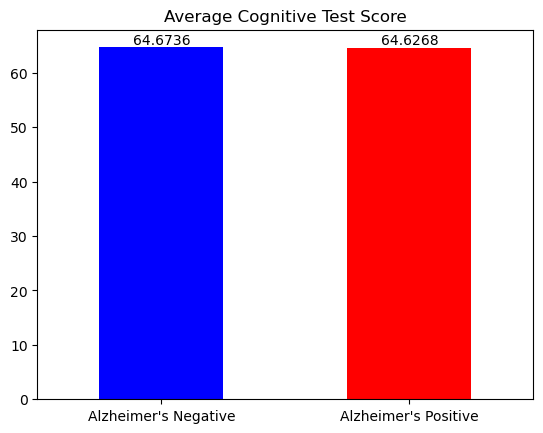

In [31]:
ax = cogn_mean.plot.bar(color=["blue", "red"], rot=0)
ax.bar_label(ax.containers[0])

plt.xticks(
    range(len(cogn_mean.index)), ["Alzheimer's Negative", "Alzheimer's Positive"]
)
plt.xlabel("")
plt.title("Average Cognitive Test Score")
plt.savefig("Images/CognitiveTestScore/cogn_mean.png", bbox_inches="tight")
plt.show()

In [32]:
# T-test for Cognitive Test Scores Differences
t_stat, p_value_cogn = st.ttest_ind(
    c_yes_alz["Cognitive Test Score"], c_no_alz["Cognitive Test Score"], equal_var=False
)

# Print results
print("T-test for Cognitive Test Scores and Alzheimer's Diagnosis")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value_cogn:.2f}")

x = "has" if p_value_cogn == 0.05 else "does NOT have"
print(f"Cognitive test score {x} a significant impact on Alzheimer's diagnosis")

T-test for Cognitive Test Scores and Alzheimer's Diagnosis
T-statistic: -0.3111, P-value: 0.76
Cognitive test score does NOT have a significant impact on Alzheimer's diagnosis


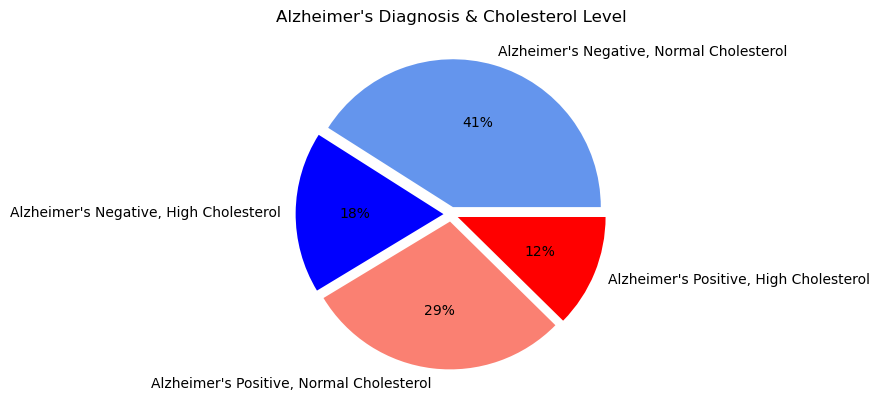

In [33]:
chol_count = alz_group["Cholesterol Level"].value_counts()

chol_labels = [
    "Alzheimer's Negative, Normal Cholesterol",
    "Alzheimer's Negative, High Cholesterol",
    "Alzheimer's Positive, Normal Cholesterol",
    "Alzheimer's Positive, High Cholesterol",
]

chol_count.plot.pie(
    autopct="%1.0f%%",
    ylabel="",
    labels=chol_labels,
    explode=(0.05, 0.05, 0.05, 0.05),
    colors=["cornflowerblue", "blue", "salmon", "red"],
    title="Alzheimer's Diagnosis & Cholesterol Level"
)
plt.savefig("Images/Cholesterol/cholesterol_general.png", bbox_inches="tight")
plt.show()

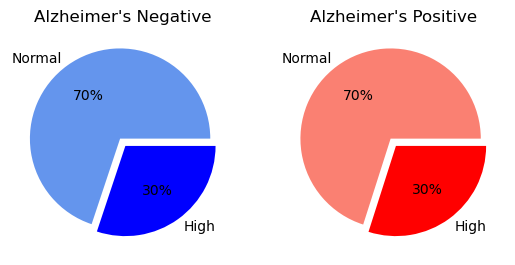

In [34]:
chol_no = chol_count.loc["No"]
chol_yes = chol_count.loc["Yes"]

plt.subplot(1, 2, 1)
chol_no.plot.pie(
    autopct="%1.0f%%",
    ylabel="",
    explode=(0.05, 0.05),
    colors=["cornflowerblue", "blue"],
    title="Alzheimer's Negative",
)
plt.subplot(1, 2, 2)
chol_yes.plot.pie(
    autopct="%1.0f%%",
    ylabel="",
    explode=(0.05, 0.05),
    colors=["salmon", "red"],
    title="Alzheimer's Positive",
)
plt.savefig("Images/Cholesterol/chol_pies.png", bbox_inches="tight")
plt.show()

In [36]:
# Chi-square test for Dietary Habits
cholesterol_contingency_table = pd.crosstab(
    alzheimers_df["Cholesterol Level"], alzheimers_df["Alzheimer’s Diagnosis"]
)
chi2, p_value_chol, df, expected = st.chi2_contingency(cholesterol_contingency_table)
critical_value = st.chi2.ppf(q = 0.95, df = df)

# Print Results
print("Chi-square test for Cholesterol Level and Alzheimer's Diagnosis")
print(
    f"Critical value: {critical_value}, Chi-square statistic: {chi2}, P-value: {p_value_chol:.2f}, Degrees of Freedom: {df}"
)

x = "has" if p_value_chol == 0.05 else "does NOT have"
print(f"Cholesterol Level {x} a significant impact on Alzheimer's diagnosis")

Chi-square test for Cholesterol Level and Alzheimer's Diagnosis
Critical value: 3.841458820694124, Chi-square statistic: 0.3195112054318619, P-value: 0.57, Degrees of Freedom: 1
Cholesterol Level does NOT have a significant impact on Alzheimer's diagnosis


## Rache Morris
Does Age have an impact on Alzheimer’s diagnosis?

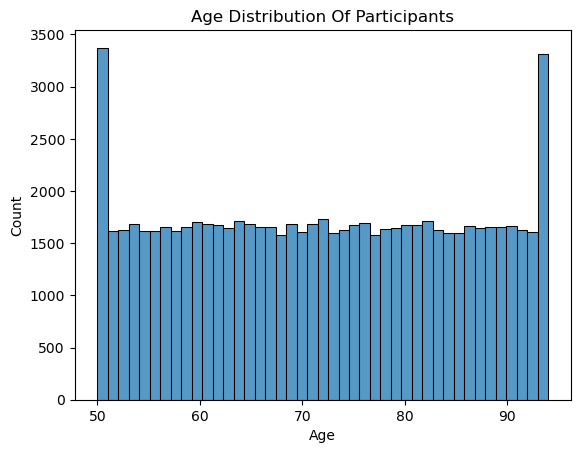

In [ ]:
# Plot Histogram Chart by Age
sns.histplot(alzheimers_df["Age"])
plt.title("Age Distribution Of Participants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("Images/Age/age_distr.png", bbox_inches="tight")
plt.show()

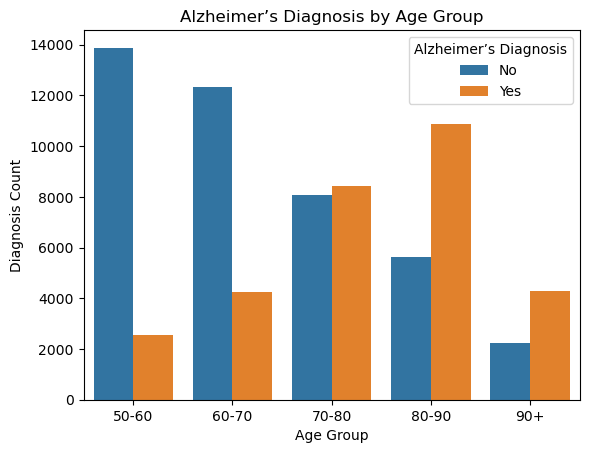

In [ ]:
alzheimers_df["Age Group"] = pd.cut(
    alzheimers_df["Age"],
    bins=[50, 60, 70, 80, 90, 100],
    labels=["50-60", "60-70", "70-80", "80-90", "90+"],
)
sns.countplot(data=alzheimers_df, x="Age Group", hue="Alzheimer’s Diagnosis")
plt.title("Alzheimer’s Diagnosis by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Diagnosis Count")
plt.savefig("Images/Age/age_alz.png", bbox_inches="tight")
plt.show()

## Johanna Santacruz
Insert question here